##Machine Translation Using a Seq2Seq Architecture
© 2023, Zaka AI, Inc. All Rights Reserved.

---
The goal of this colab is to get you more familiar with the Seq2Seq models and their challenges. For this reason, you will be working on machine translation problem where we would have a sentence as input (in english), and the output is gonna be the translated sentence (in french). So just like what happens with Google Translate.


**Just to give you a heads up:** We won't be having a model performing like Google translate, but at least we will have an idea about how Google Translate works and the challenges that exist with a translation problem.  

## Importing Libraries

We start by importing numpy and pandas and then we can add the rest

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import string
import random
from keras.models import Model
import nltk
from nltk.corpus import stopwords
from nltk import ne_chunk, pos_tag, word_tokenize
from nltk.tree import Tree
from nltk.tokenize import word_tokenize
from nltk.stem import SnowballStemmer, WordNetLemmatizer
from nltk.translate.bleu_score import corpus_bleu
from keras.optimizers import Adam, Adadelta, Adamax
from tensorflow.keras.preprocessing.text import Tokenizer
from keras.models import Sequential
from keras import regularizers
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from keras.layers import Embedding, Bidirectional, Dot, Softmax, Input, GRU, Dense, Dropout, Concatenate, Attention, LSTM, TimeDistributed, RepeatVector
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from sklearn.model_selection import train_test_split

In [4]:
# Download the NLTK resources
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping chunkers/maxent_ne_chunker.zip.
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


True

We clone the github repository where our data exists. Here is the github link: https://github.com/zaka-ai/machine_learning_certification/tree/main/Challenge%207 

## Getting the data

In [5]:
#Test Your Zaka
# Clone the GitHub repository
!git clone https://github.com/zaka-ai/machine_learning_certification.git

Cloning into 'machine_learning_certification'...
remote: Enumerating objects: 43, done.
remote: Counting objects: 100% (43/43), done.
remote: Compressing objects: 100% (39/39), done.
remote: Total 43 (delta 10), reused 10 (delta 1), pack-reused 0
Unpacking objects: 100% (43/43), 43.23 MiB | 9.59 MiB/s, done.


We read the english sentences in a dataframe named "english", and the french sentences in a dataframe named "french"

In [6]:
#Test Your Zaka (English)
english = pd.read_csv('machine_learning_certification/Challenge 7/en.csv', header=None)

In [7]:
#Test Your Zaka (French)
french = pd.read_csv('machine_learning_certification/Challenge 7/fr.csv', header=None)

**How many sentences does each of the files contain?**

In [8]:
#Test Your Zaka
en_sentences = len(english)
fr_sentences = len(french)
print("Number of English sentences:", en_sentences)
print("Number of French sentences:", fr_sentences)

Number of English sentences: 137860
Number of French sentences: 137860


Now let us concatenate the 2 dataframes into one dataframe that we call **df** where one column has the english senetnces and the other has the french sentences

In [9]:
#Test Your Zaka
# Concatenate the English and French dataframes into a single dataframe called "df"
df = pd.concat([english, french], axis=1)

Let's name the columns as **English** and **French** so that we access them easier.

In [10]:
#Test Your Zaka
df.columns = ['English', 'French']

Pick a sentence and print it in both languages

In [11]:
#Test Your Zaka
# Select a random sentence index
idx = random.randint(0, len(df)-1)
# Print the corresponding English and French sentences
print('English Sentence: {}\n'.format(df['English'][idx]))
print('French Sentence: {}\n'.format(df['French'][idx]))

English Sentence: he plans to visit china in march .

French Sentence: il envisage de se rendre en chine en mars .



##Cleaning Data

The data that we have is almost clean as we can see, we just need to remove the punctuations inside of it.

In [12]:
#Test Your Zaka
def remove_punctuations(sentence):
    # Create a string with all the punctuations to remove
    punctuations = string.punctuation
    # Create a translation table to remove the punctuations from the sentence
    translator = str.maketrans('', '', punctuations)
    # Remove the punctuations from the sentence using the translation table
    sentence = sentence.translate(translator)
    return sentence
df['english'] = df['English'].apply(remove_punctuations)
df['french'] = df['French'].apply(remove_punctuations)

Make sure that the punctuation is removed by printing the example that you printed earlier.

In [13]:
#Test Your Zaka
print("Original English sentence: ", df['English'][idx]+'\n')
print("Cleaned English sentence: ", remove_punctuations(df['English'][idx] +'\n'))

print("Original French sentence: ", df['French'][idx]+'\n')
print("Cleaned French sentence: ", remove_punctuations(df['French'][idx]),'\n')

Original English sentence:  he plans to visit china in march .

Cleaned English sentence:  he plans to visit china in march 

Original French sentence:  il envisage de se rendre en chine en mars .

Cleaned French sentence:  il envisage de se rendre en chine en mars  



##Exploring the Data

Add a column **ENG Length** to the dataset that shows how many words does a sentence contain, and do the same for french in a column called **FR Length**

In [14]:
#Test Your Zaka
# Add columns for ENG Length and FR Length
df['ENG Length'] = df['english'].apply(lambda x: len(x.split()))

In [15]:
#Test Your Zaka
# Add columns for ENG Length and FR Length
df['FR Length'] = df['french'].apply(lambda x: len(x.split()))

Visualize the distribution of the lengths of english sentences and french sentences.

Text(0, 0.5, 'Frequency')

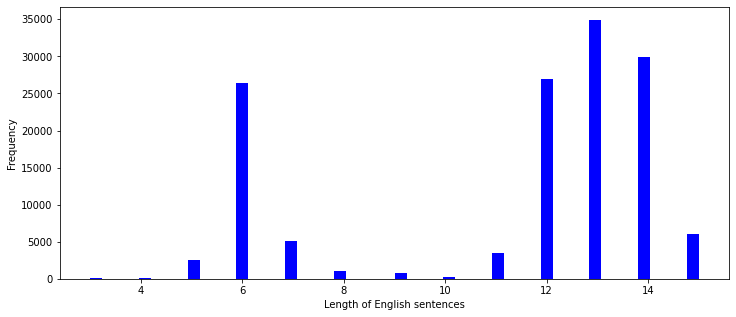

In [16]:
#Test Your Zaka
# Create a figure with two subplots
fig, axs = plt.subplots(1, figsize=(12, 5))

# Plot the distribution of English sentence lengths
axs.hist(df['ENG Length'], bins=50, color='blue')
axs.set_xlabel('Length of English sentences')
axs.set_ylabel('Frequency')

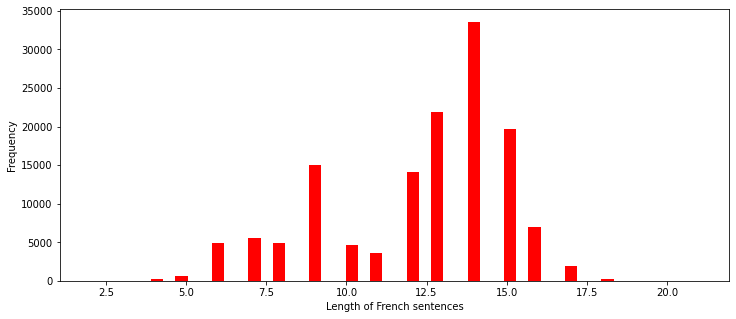

In [17]:
#Test Your Zaka
fig, axs = plt.subplots(1, figsize=(12, 5))
# Plot the distribution of French sentence lengths
axs.hist(df['FR Length'], bins=50, color='red')
axs.set_xlabel('Length of French sentences')
axs.set_ylabel('Frequency')
# Show the plot
plt.show()

Get the maximum length of an english sentence and the maximum length of a french sentence. 

In [18]:
#Test Your Zaka
max_eng_length = df['ENG Length'].max()
max_fr_length = df['FR Length'].max()
print(max_eng_length, max_fr_length)

15 21


In [19]:
# Define the stop words to be removed
stop_words = set(stopwords.words('english'))
# Define the stop words to be removed
stop_words = set(stopwords.words('french'))
def apply_lemmatization(sentence):
    # Tokenize the sentence into wordsa
    words = word_tokenize(sentence)
    # Initialize the WordNetLemmatizer for English language
    lemmatizer = WordNetLemmatizer()
    # Apply lemmatization on each word in the sentence
    lemmatized_words = [lemmatizer.lemmatize(word) for word in words]
    # Join the lemmatized words into a sentence
    lemmatized_sentence = " ".join(lemmatized_words)
    return lemmatized_sentence
    
df['english'] = df['english'].apply(apply_lemmatization)
df['french'] = df['french'].apply(apply_lemmatization)


##Preprocessing the Data

In order for the data to be fed to the model, it has to be tokenized and padded. 

####Tokenization

**To tokenize english and french sentences, we can use only one tokenizer. True or False?**

[False]

Tokenize the sentences that we have.

In [20]:
#Test Your Zaka
# Tokenize the English sentences
eng_tokenizer = Tokenizer()
eng_tokenizer.fit_on_texts(df['english'])
eng_sequences = eng_tokenizer.texts_to_sequences(df['english'])

# Tokenize the French sentences
fr_tokenizer = Tokenizer()
fr_tokenizer.fit_on_texts(df['french'])
fr_sequences = fr_tokenizer.texts_to_sequences(df['french'])
# Find the number of unique words in the English sentences
num_eng_words = len(eng_tokenizer.word_index)+1
num_fr_words = len(fr_tokenizer.word_index)+1

**How many unique words do we have in english and in french?**

In [21]:
#Test Your Zaka
# Find the number of unique words in the English sentences
num_eng_words = len(eng_tokenizer.word_index)+1
print("Number of unique words in English sentences:", num_eng_words)

# Find the number of unique words in the French sentences
num_fr_words = len(fr_tokenizer.word_index)+1
print("Number of unique words in French sentences:", num_fr_words)

Number of unique words in English sentences: 171
Number of unique words in French sentences: 331


####Padding

**What should be the length of the sequences that we have after padding?**

the length of the sequences after padding should be for english 15 and 21 for french we will choose 21 as threshold to be the fixed length to work with

Perform padding on the sequences that we have.

In [22]:
#Test Your Zaka
fixed_length = 21
# Perform padding on English sequences
eng_padded_sequences = pad_sequences(eng_sequences, maxlen=fixed_length , padding='post')
# Perform padding on French sequences
fr_padded_sequences = pad_sequences(fr_sequences, maxlen=fixed_length , padding='post')

In [23]:
# Split the dataset into training and test sets (80% training, 20% test)
X_train, X_test, y_train, y_test = train_test_split(eng_padded_sequences, fr_padded_sequences, test_size=0.2, random_state=42)

# Split the training set into training and validation sets (90% training, 10% validation)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42)

##Modeling

After preprrocessing the data, we can build our model. Start by building a baseline architecture relying on one directional RNNs, LSTMs, or GRUs. It will be good to lookup how to build Seq2Seq models, there are some new layers that will help you like RepeatVector and TimeDistributed.

In [24]:
#Test Your Zaka
# Define the model architecture
model = Sequential()
model.add(Embedding(num_eng_words, 64, input_length=fixed_length))
model.add(LSTM(512, return_sequences=True))
model.add(Dense(256))
model.add(LSTM(256, return_sequences=True))
model.add(LSTM(128, return_sequences=True))
model.add(Dense(256, activation='softmax'))
model.add(LSTM(512, return_sequences=True))
model.add(TimeDistributed(Dense(num_fr_words, activation='softmax')))

# Add early stopping
early_stop = EarlyStopping(monitor='val_loss', patience=5, mode='min', restore_best_weights=True)

# Print the model summary
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 21, 64)            10944     
                                                                 
 lstm (LSTM)                 (None, 21, 512)           1181696   
                                                                 
 dense (Dense)               (None, 21, 256)           131328    
                                                                 
 lstm_1 (LSTM)               (None, 21, 256)           525312    
                                                                 
 lstm_2 (LSTM)               (None, 21, 128)           197120    
                                                                 
 dense_1 (Dense)             (None, 21, 256)           33024     
                                                                 
 lstm_3 (LSTM)               (None, 21, 512)           1

Compile and train the model. 
**FYI:** While specifying the architecture of your model and the number of epochs for training, keeep in your mind that your model might take A LOT of time to train.

In [25]:
#Test Your Zaka
# Compile the model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# Train the model
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=50, batch_size=64, callbacks=[early_stop])


Epoch 1/50
1551/1551 [==============================] - 55s 27ms/step - loss: 1.4906 - accuracy: 0.6174 - val_loss: 0.9766 - val_accuracy: 0.7029
Epoch 2/50
1551/1551 [==============================] - 31s 20ms/step - loss: 0.8546 - accuracy: 0.7309 - val_loss: 0.7291 - val_accuracy: 0.7662
Epoch 3/50
1551/1551 [==============================] - 32s 21ms/step - loss: 0.6418 - accuracy: 0.7915 - val_loss: 0.5478 - val_accuracy: 0.8192
Epoch 4/50
1551/1551 [==============================] - 38s 25ms/step - loss: 0.4830 - accuracy: 0.8442 - val_loss: 0.4099 - val_accuracy: 0.8699
Epoch 5/50
1551/1551 [==============================] - 33s 21ms/step - loss: 0.3632 - accuracy: 0.8859 - val_loss: 0.3284 - val_accuracy: 0.8955
Epoch 6/50
1551/1551 [==============================] - 32s 21ms/step - loss: 0.3066 - accuracy: 0.9013 - val_loss: 0.2956 - val_accuracy: 0.9051
Epoch 7/50
1551/1551 [==============================] - 32s 20ms/step - loss: 0.2757 - accuracy: 0.9090 - val_loss: 0.2667 -

Define a function that gets an input sentence in english and gives the output sentence in the french language.

In [26]:
#Test Your Zaka
def translate_to_french(input_sentence):
    # Convert the input sentence to a sequence of integers using the English tokenizer
    input_seq = eng_tokenizer.texts_to_sequences([input_sentence])[0]
    # Pad the input sequence
    input_padded = pad_sequences([input_seq], maxlen=fixed_length, padding='post')
    # Use the trained model to generate the output sequence
    output_seq = model.predict(input_padded)[0]
    # Convert the output sequence to a sequence of integers
    output_seq = np.argmax(output_seq, axis=-1)
    # Convert the output sequence to a sentence using the French tokenizer
    output_sentence = fr_tokenizer.sequences_to_texts([output_seq])[0]
    # Remove the padding token from the output sentence
    output_sentence = output_sentence.replace('<pad>', '').strip()
    return output_sentence

Test the following sentence

In [27]:
input = "she is driving the truck"

#Test Your Zaka
predicted_french_sentence = translate_to_french(input)
print(input + ' : \n' +predicted_french_sentence)  

1/1 [==============================] - 1s 1s/step
she is driving the truck : 
elle conduit cette grande camion brillant


Try to improve your model by modifying the architecture to take into account bidirectionality which is very useful in Machine Translation. Create a new model called model2

In [43]:
#Test Your Zaka
# Define the model architecture
model2 = Sequential()
model2.add(Embedding(num_eng_words, 64, input_length=fixed_length))
model2.add(Bidirectional(LSTM(512, return_sequences=True)))
model2.add(Bidirectional(LSTM(256, return_sequences=True)))
model2.add(Bidirectional(LSTM(128, return_sequences=True)))
model2.add(Bidirectional(LSTM(512, return_sequences=True)))
model2.add(TimeDistributed(Dense(num_fr_words, activation='softmax')))

# Add early stopping
early_stop = EarlyStopping(monitor='val_loss', patience=5, mode='min', restore_best_weights=True)

# Print the model summary
model2.summary()


Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_5 (Embedding)     (None, 21, 64)            10944     
                                                                 
 bidirectional_16 (Bidirecti  (None, 21, 1024)         2363392   
 onal)                                                           
                                                                 
 bidirectional_17 (Bidirecti  (None, 21, 512)          2623488   
 onal)                                                           
                                                                 
 bidirectional_18 (Bidirecti  (None, 21, 256)          656384    
 onal)                                                           
                                                                 
 bidirectional_19 (Bidirecti  (None, 21, 1024)         3149824   
 onal)                                                

compile and train your new model.

In [44]:
#Test Your Zaka
# Compile the model
model2.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
# Train the model
history = model2.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=50, batch_size=128, callbacks=[early_stop])


Epoch 1/50
776/776 [==============================] - 71s 71ms/step - loss: 1.3679 - accuracy: 0.6474 - val_loss: 0.7763 - val_accuracy: 0.7653
Epoch 2/50
776/776 [==============================] - 49s 63ms/step - loss: 0.4889 - accuracy: 0.8488 - val_loss: 0.2685 - val_accuracy: 0.9137
Epoch 3/50
776/776 [==============================] - 49s 63ms/step - loss: 0.2096 - accuracy: 0.9320 - val_loss: 0.1728 - val_accuracy: 0.9417
Epoch 4/50
776/776 [==============================] - 49s 63ms/step - loss: 0.1362 - accuracy: 0.9555 - val_loss: 0.1153 - val_accuracy: 0.9611
Epoch 5/50
776/776 [==============================] - 49s 64ms/step - loss: 0.1060 - accuracy: 0.9653 - val_loss: 0.0970 - val_accuracy: 0.9678
Epoch 6/50
776/776 [==============================] - 50s 64ms/step - loss: 0.0830 - accuracy: 0.9728 - val_loss: 0.0827 - val_accuracy: 0.9729
Epoch 7/50
776/776 [==============================] - 50s 64ms/step - loss: 0.0696 - accuracy: 0.9771 - val_loss: 0.0766 - val_accuracy:

Define a new function that relies on your new model to make predictions.

In [47]:
#Test Your Zaka
def translate_to_french_1(input_sentence):
    # Convert the input sentence to a sequence of integers using the English tokenizer
    input_seq = eng_tokenizer.texts_to_sequences([input_sentence])[0]
    # Pad the input sequence
    input_padded = pad_sequences([input_seq], maxlen=fixed_length, padding='post')
    # Use the trained model to generate the output sequence
    output_seq = model2.predict(input_padded)[0]
    # Convert the output sequence to a sequence of integers
    output_seq = np.argmax(output_seq, axis=-1)
    # Convert the output sequence to a sentence using the French tokenizer
    output_sentence = fr_tokenizer.sequences_to_texts([output_seq])[0]
    # Remove the padding token and any other unwanted characters from the output sentence
    output_sentence = output_sentence.replace('<pad>', '').replace(' <eos>', '').strip()
    return output_sentence

In [48]:
input = "she is driving the truck"

#Test Your Zaka
predicted_french_sentence = translate_to_french_1(input)
print(input + ' : \n' +predicted_french_sentence)  

1/1 [==============================] - 0s 25ms/step
she is driving the truck : 
elle conduit le camion bleu rouillé


In [49]:
from nltk.translate.bleu_score import sentence_bleu
def calculate_bleu_score(input_sentence, target_sentence):
    # Convert the input sentence to a sequence of integers using the English tokenizer
    input_seq = eng_tokenizer.texts_to_sequences([input_sentence])[0]
    # Pad the input sequence
    input_padded = pad_sequences([input_seq], maxlen=fixed_length, padding='post')
    # Use the trained model to generate the output sequence
    output_seq = model2.predict(input_padded)[0]
    # Convert the output sequence to a sequence of integers
    output_seq = np.argmax(output_seq, axis=-1)
    # Convert the output sequence to a sentence using the French tokenizer
    output_sentence = fr_tokenizer.sequences_to_texts([output_seq])[0]
    # Remove the padding token and any other unwanted characters from the output sentence
    output_sentence = output_sentence.replace('<pad>', '').replace(' <eos>', '').strip()

    # Calculate the BLEU score between the predicted sentence and the target sentence
    bleu_score = sentence_bleu([target_sentence.split()], output_sentence.split())
    return bleu_score

input = "she is driving the truck"
target_french_sentence = "elle conduit le camion"

predicted_french_sentence = translate_to_french_1(input)
bleu_score = calculate_bleu_score(input, target_french_sentence)

print("Input sentence: " + input)
print("Target French sentence: " + target_french_sentence)
print("Predicted French sentence: " + predicted_french_sentence)
print("BLEU score: ", bleu_score)

1/1 [==============================] - 0s 24ms/step
Input sentence: she is driving the truck
Target French sentence: elle conduit le camion
Predicted French sentence: elle conduit le camion bleu rouillé
BLEU score:  0.5081327481546147


**What is another adjustment in terms of architecture that you might be able to do to improve your model?**

Addition of attention processes might be a potential modification to further enhance the model's performance The model can generate the output sequence while focusing on the portions of the input sequence with the use of attention processes which can improve the quality of the translation.

**What are some additional ways that we can do to improve the performance of our model?**

try out different combinations of the hyperparameters learning rate, batch size, and number of epochs.
Use pre-trained word embeddings to assist the model better
To improve the diversity of the data and avoid overfitting we can use data augmentation techniques such random word deletion, insertion, or replacement in the input phrases.